# NYC Borough Per Capita Refuse Analysis for the Years 1992-2018

<p> We obtained refuse data for the five New York City boroughs for the years 1992-2019 from the <a href=https://opendata.cityofnewyork.us/> New York City</a> open data website. We also obtained census population data and interpolated yearly intercensal population estimates for each NYC borough. Using this data, we were able to determine yearly per capita refuse output in each NYC borough. 

In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [2]:
# Import population data from population estimates file
input_1 = os.path.join("..","Population_Estimate_Analysis","CD_population_estimates.csv")
population_df = pd.read_csv(input_1,index_col="CD_ID")
population_df = population_df.drop(["1990", "1991"],axis=1)

# Import trash data from clean tonnage data file
input_2 = os.path.join("..","Clean_Data","TonnageClean.csv")
trash_df = pd.read_csv(input_2,index_col=0)

In [3]:
# Drop recycling information as we are only interested in looking at total refuse per capita
trash_df=trash_df[trash_df["Year"]<2019].drop(["MGP","Paper"],axis=1)

In [4]:
# Group population data by borough and sum population in each borough
population_gb = population_df.groupby("Borough")
population_borough_df = population_gb.sum()
population_borough_df.head()

,CD Number,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Borough,,,,,,,,,,,,,,,,,,,,,
Bronx,78,1214085.0,1230073.0,1242225.0,1253781.0,1264701.0,1277974.0,1293392.0,1310741.0,1327454.0,...,1369610.0,1380697.0,1390662.0,1404942.0,1415516.0,1424670.0,1433814.0,1438303.0,1432818.0,1425261.0
Brooklyn,171,2324988.0,2345038.0,2359151.0,2370230.0,2381460.0,2399038.0,2420456.0,2445506.0,2465299.0,...,2482879.0,2504609.0,2535489.0,2563484.0,2583068.0,2597217.0,2605128.0,2605751.0,2590935.0,2577409.0
Manhattan,78,1477940.0,1485244.0,1495152.0,1505004.0,1511826.0,1517390.0,1520681.0,1524838.0,1529357.0,...,1572078.0,1577385.0,1596702.0,1612412.0,1616152.0,1619270.0,1624996.0,1624547.0,1618112.0,1617041.0
Queens,105,2004987.0,2032050.0,2056701.0,2083576.0,2114712.0,2147904.0,2184611.0,2218820.0,2240510.0,...,2223765.0,2241021.0,2261893.0,2279128.0,2294620.0,2306608.0,2314095.0,2315517.0,2303315.0,2285306.0
Staten Island,6,393627.0,400495.0,404052.0,407382.0,412193.0,418358.0,426493.0,435257.0,442588.0,...,465207.0,467968.0,469343.0,469000.0,470237.0,470413.0,470858.0,472545.0,473842.0,474503.0


In [5]:
# Split trash dataframe to create borough column
trash_df["CD_ID"]=trash_df["Borough"] + " " + trash_df["CD"].map(str)

In [6]:
trash_df.head(2)

,Month Index,Year/Month,Year,Month,Borough,CD,Refuse,CD_ID
0,23,1993 / 11,1993,11,Manhattan,1,625.2,Manhattan 1
1,45,1995 / 09,1995,9,Manhattan,1,633.1,Manhattan 1


In [7]:
# Group trash dataframe by year and borough
gb = trash_df.groupby(["Year","Borough"])

In [8]:
# Create dictionary of lists in order to create dataframe
pctrash_dict = {"Borough":[],
               "Year":[],
               "PC_Trash":[]}

# Compute per capita trash in each borough by dividing total refuse per borough in 
# trash groupby dataframe by total population in population by borough dataframe  
for name,frame in gb:
    year = str(name[0])
    borough = name[1]
    pctrash_dict["Year"].append(year)
    pctrash_dict["Borough"].append(borough)
    total_refuse = frame["Refuse"].sum()
    population = population_borough_df.loc[borough,year]
    pctrash_dict["PC_Trash"].append(total_refuse/population)

In [9]:
# Create dataframe from dictionary of lists 
PerCapitaTrash_Borough = pd.DataFrame(pctrash_dict)

In [10]:
# Output per capita trash output data to CSV
output_0 = os.path.join("..","Clean_Data","Borough_PerCapita_Trash.csv")
PerCapitaTrash_Borough.to_csv(output_0)

In [11]:
# Visualize per capita data
PerCapitaTrash_Borough

,Borough,Year,PC_Trash
0,Bronx,1992,0.387858
1,Brooklyn,1992,0.412886
2,Manhattan,1992,0.348662
3,Queens,1992,0.390260
4,Staten Island,1992,0.450820
...,...,...,...
130,Bronx,2018,0.287883
131,Brooklyn,2018,0.316453
132,Manhattan,2018,0.261429
133,Queens,2018,0.305159


In [12]:
# Reformat dataframe in order to graph borough time series
pc_trash_pivot = PerCapitaTrash_Borough.pivot_table("PC_Trash", ["Year"], "Borough")
pc_trash_pivot.head()

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Year,,,,,
1992,0.387858,0.412886,0.348662,0.390260,0.450820
1993,0.347817,0.385146,0.324454,0.375493,0.439442
1994,0.354846,0.374546,0.333761,0.363333,0.453354
1995,0.349729,0.354693,0.327943,0.355466,0.436036
1996,0.347080,0.363988,0.338074,0.365624,0.438128


(0, 0.6)

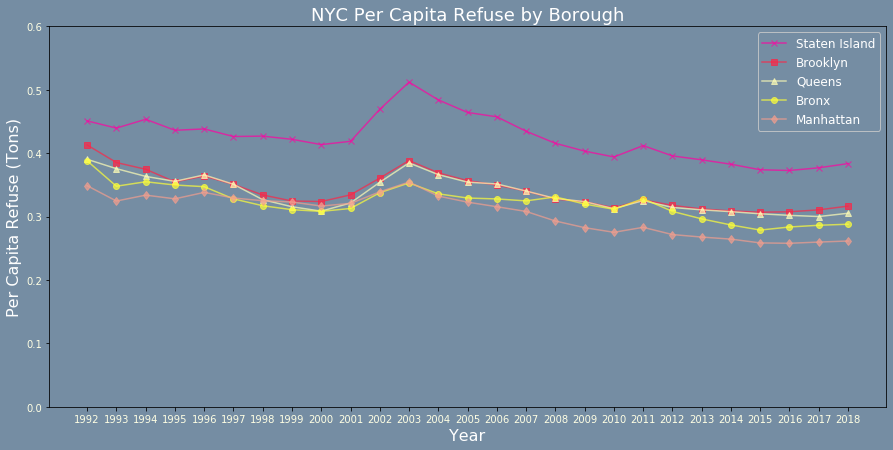

In [34]:
# Plot boroughs as series over time
fig, ax = plt.subplots(figsize=(15,7))
year = pc_trash_pivot.index

# Plot Staten Island
Staten_pctrash = pc_trash_pivot["Staten Island"]
ax.plot(year, Staten_pctrash, marker="x", color="xkcd:shocking pink", label="Staten Island", alpha=0.7)

# Plot Brooklyn
Brooklyn_pctrash = pc_trash_pivot["Brooklyn"]
ax.plot(year, Brooklyn_pctrash, marker="s", color="xkcd:pinky red", label="Brooklyn", alpha=0.7)

# Plot Queens
Queens_pctrash = pc_trash_pivot["Queens"]
ax.plot(year, Queens_pctrash, marker="^", color="xkcd:light beige", label="Queens", alpha=0.7)

# Plot Bronx
Bronx_pctrash = pc_trash_pivot["Bronx"]
ax.plot(year, Bronx_pctrash, marker="o", color="xkcd:lemon yellow", label="Bronx", alpha=0.7)

# Plot Manhattan
Manhattan_pctrash = pc_trash_pivot["Manhattan"]
ax.plot(year, Manhattan_pctrash, marker="d", color="xkcd:blush", label="Manhattan", alpha=0.7)

# Annotate plot
legend = plt.legend(loc="best", prop={'size': 12},facecolor="xkcd:blue/grey")
plt.setp(legend.get_texts(), color='xkcd:white')
plt.title("NYC Per Capita Refuse by Borough", fontsize="18",color='xkcd:white')
plt.xlabel("Year", fontsize="16",color='xkcd:white')
plt.ylabel("Per Capita Refuse (Tons)", fontsize="16",color='xkcd:white')
plt.xticks(color='xkcd:off white')
plt.yticks(color='xkcd:off white')
ax.set_facecolor('xkcd:blue/grey')
fig.patch.set_facecolor('xkcd:blue/grey')
plt.ylim(0,.6)


In [33]:
fig.savefig(os.path.join("..","Analysis_Images","NYC Per Capita Refuse by Borough.png"),facecolor=fig.get_facecolor())